# Cantidades Físicas en Cinemática

Supongamos un cuerpo de masa arbitraria que describe la siguiente trayectoria:

$$\vec{r}(t)=\left(\frac{}{}x(t)\hat{i}+y(t)\hat{j}\frac{}{}\right) [m],$$

con $x(t)=t^3-32 t$ e $y(t)=5t^2+12 t$, para $t>0$.

Entonces la velocidad y aceleración instántaneas están dadas por:

$$\vec{v}(t):=\frac{d\vec{r}}{dt}=\left(\frac{}{}(3t^2-32)\hat{i}+(10t)\hat{j}\frac{}{}\right)\left[\frac{m}{s}\right],$$ 

$$\vec{a}(t):=\frac{d\vec{v}}{dt}=\left(\frac{}{}(6t)\hat{i}+(10)\hat{j}\frac{}{}\right)\left[\frac{m}{s^2}\right].$$

In [1]:
#Written by Nataly Ibarra at August 2016.
#Licensed under Creative Commons 4.0. See http://creativecommons.org/licenses/by/4.0
#For details contact natalynicole.ibarravera@gmail.com
%matplotlib inline 
# Esta línea permite incrustar gráficos en el notebook
import matplotlib.pyplot as plt # Se importa paquete que permite graficar
import numpy as np # Se import paquete que hace cálculos numéricos
import sympy as sp # Se importa paquete que hace cáculos simbólicos

# Cálculo simbólico

A continuación se realiza el cálculo de la velocidad y aceleración del cuerpo conocido su vector posición $\vec{r}=r_{x}\hat{i}+r_{y}\hat{j}+r_{z}\hat{k}$para todo tiempo $t$.

In [2]:
#se definen variables simbólicas a emplear
t = sp.Symbol('t')
rx = sp.Function('x')(t)
ry = sp.Function('y')(t)
rz = sp.Function('z')(t)

In [3]:
#se definen las componentes del vector posición
rx = t**3-32.*t
ry = 5*t**2+12
rz = 0*t
#rx = 5*t
#ry = 0*t
#rz = 0*t
#Si se modifican estas líneas cambiará toda la 
#dinámica que prosigue en el código!

In [4]:
#Se calcula simbólicamente las componentes de 
#la velocidad y la aceleración
vx = rx.diff(t)
vy = ry.diff(t)
vz = rz.diff(t)
ax = vx.diff(t)
ay = vy.diff(t)
az = vz.diff(t)

In [5]:
#Se imprimen las cantidades dinámicas
print(70*'=')
print('Evolución de cantidades dinámicas:')
print('rx(t) =',rx)
print('ry(t) =',ry)
print('rz(t) =',rz)
print('vx(t) =',vx)
print('vy(t) =',vy)
print('vz(t) =',vz)
print('ax(t) =',ax)
print('ay(t) =',ay)
print('az(t) =',az)
print(70*'=')

Evolución de cantidades dinámicas:
rx(t) = t**3 - 32.0*t
ry(t) = 5*t**2 + 12
rz(t) = 0
vx(t) = 3*t**2 - 32.0
vy(t) = 10*t
vz(t) = 0
ax(t) = 6*t
ay(t) = 10
az(t) = 0


# Cálculo Numérico

A continuación se sustituye la variable "simbólica" $t$ por una numérica $tt$ y se "vectoriza" cada una de las cantidades dinámicas para que puedan ser evaluadas por arreglos numéricos de $tt$.

In [6]:
def fn(fa,tt):
    return fa.subs(t,tt)
fv = np.vectorize(fn)
def gn(t):
    return [fv(rx,t),fv(ry,t),fv(rz,t),
            fv(vx,t),fv(vy,t),fv(vz,t),
           fv(ax,t),fv(ay,t),fv(az,t)]

In [7]:
#Se evalúan  las cantidades dinámicas
#para t = 0 y para un arreglo con t en [-1,1]
x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0 = gn(0) #cantidades con t=0
print(70*'=')
print('Condiciones iniciales:')
print('r0 = %dxi + %dxj + %dxk'%(x0,y0,z0))
print('v0 = %dxi + %dxj + %dxk'%(vx0,vy0,vz0))
print('a0 = %dxi + %dxj + %dxk'%(ax0,ay0,az0))
print(70*'=')
tt = np.linspace(-10,10,100)
rrx,rry,rrz,vvx,vvy,vvz,aax,aay,aaz = gn(tt) #cantidades con t en [-1,1]

Condiciones iniciales:
r0 = 0xi + 12xj + 0xk
v0 = -32xi + 0xj + 0xk
a0 = 0xi + 10xj + 0xk


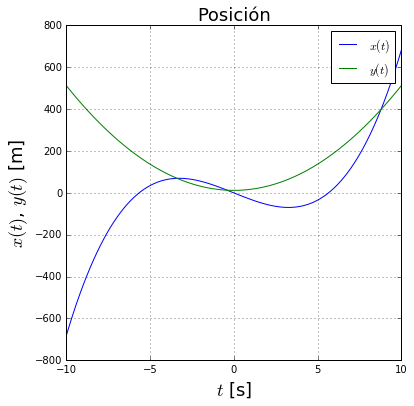

In [8]:
#Se dibujan coordenadas v/s tiempo
plt.figure(figsize=(6,6))
plt.plot(tt,rrx,label='$x(t)$')
plt.plot(tt,rry,label='$y(t)$')
plt.title(u'Posición',fontsize=18)
plt.xlabel('$t$ [s]',fontsize=18)
plt.ylabel('$x(t)$, $y(t)$ [m]',fontsize=18)
plt.grid()
plt.legend()

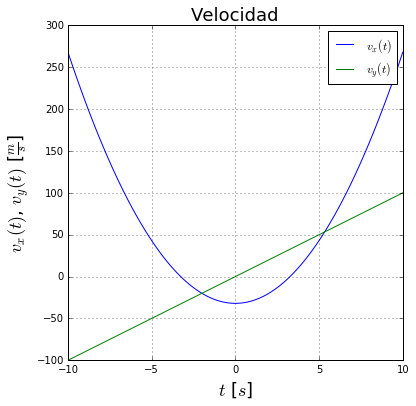

In [9]:
#Se dibujan componentes de velocidad v/s tiempo
plt.figure(figsize=(6,6))
plt.plot(tt,vvx,label='$v_{x}(t)$')
plt.plot(tt,vvy,label='$v_{y}(t)$')
plt.title(u'Velocidad',fontsize=18)
plt.xlabel('$t$ [$s$]',fontsize=18)
plt.ylabel(r'$v_{x}(t)$, $v_{y}(t)$ [$ \frac{m}{s}$]',fontsize=18)
plt.grid()
plt.legend()

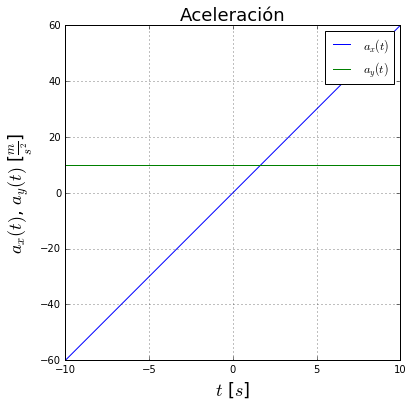

In [10]:
#Se dibujan componentes de aceleración v/s tiempo
plt.figure(figsize=(6,6))
plt.plot(tt,aax,label='$a_{x}(t)$')
plt.plot(tt,aay,label='$a_{y}(t)$')
plt.title(u'Aceleración',fontsize=18)
plt.xlabel('$t$ [$s$]',fontsize=18)
plt.ylabel(r'$a_{x}(t)$, $a_{y}(t)$ [$ \frac{m}{s^2}$]',fontsize=18)
plt.grid()
plt.legend()

# Animación

A continuación se muestra una animación de lo sucedido.

In [11]:
from __future__ import print_function, division
import vpython as vp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
#Se configura la escena de la animación
vp.scene.title = ("Trayectoria del cuerpo")
vp.scene.background = vp.color.white
vp.scene.width = 500
vp.scene.height = 500
#
#Se dibuja SC con el que se trabajará
lenght_axis = 70
shaftwidth = 1
xaxis = vp.arrow(color=vp.color.black, pos=vp.vector(0,0,0), axis=lenght_axis*vp.vector(1,0,0), shaftwidth=shaftwidth)
xlabel = vp.label(pos=vp.vector(lenght_axis+0.1,0,0), text="X", color=vp.color.black, opacity=0, height=20, box=0)
yaxis = vp.arrow(color=vp.color.black, pos=vp.vector(0,0,0), axis=lenght_axis*vp.vector(0,1,0), shaftwidth=shaftwidth)
ylabel = vp.label(pos=vp.vector(0,lenght_axis+0.1,0), text="Y", color=vp.color.black, opacity=0, height=20, box=0)
zaxis = vp.arrow(color=vp.color.black, pos=vp.vector(0,0,0), axis=lenght_axis*vp.vector(0,0,1), shaftwidth=shaftwidth)
xlabel= vp.label(pos=vp.vector(0,0,lenght_axis+0.1), text="Z", color=vp.color.black, opacity=0, height=20, box=0)

In [13]:
#Se dibujan cantidades físicas a animar
r_vector = vp.vector(x0,y0,z0)
r_axis = vp.arrow(pos=vp.vector(0,0,0), axis = r_vector, color=vp.color.red, shaftwidth=shaftwidth)
r_label = vp.label(pos=r_vector+5*r_vector/r_vector.mag, text="r", color=r_axis.color, opacity=0, height=30, box=0)
v_vector = vp.vector(vx0,vy0,z0)
v_axis = vp.arrow(pos=r_vector, axis = v_vector, color=vp.color.green, shaftwidth=shaftwidth)
v_label= vp.label(pos=r_vector+v_axis.axis+5*v_vector/v_vector.mag, text="v", color=v_axis.color, opacity=0, height=30, box=0)
a_vector = vp.vector(ax0,ay0,az0)
a_axis = vp.arrow(pos=r_vector, axis = a_vector, color=vp.color.blue, shaftwidth=shaftwidth)
a_label = vp.label(pos=r_vector+a_axis.axis+5*a_vector/a_vector.mag, text="a", color=a_axis.color, opacity=0, height=30, box=0)
t_label = vp.label(pos=r_vector+15*r_vector/r_vector.mag, text="t = 0 [s]", color=vp.color.black, opacity=0, height=20, box=0)

Notar como $\vec{v}(t)$ es tangente a la trayectoria en todo punto!

In [14]:
#Se hace evolucionar la animación
tt = np.linspace(0,10,1000)
for ti in tt:
    vp.rate(50)
    rxi,ryi,rzi,vxi,vyi,vzi,axi,ayi,azi = gn(ti)
    t_label.text = "t = %d [s]"%ti
    t_label.pos = r_vector+15*r_vector/r_vector.mag
    r_vector = vp.vector(rxi,ryi,rzi)
    v_vector = vp.vector(vxi,vyi,vzi)
    a_vector = vp.vector(axi,ayi,azi)
    r_axis.axis = r_vector
    v_axis.pos = r_vector
    v_axis.axis = v_vector
    a_axis.pos = r_vector
    a_axis.axis = a_vector
    r_label.pos = r_vector+5*r_vector/r_vector.mag
    v_label.pos = r_vector+v_axis.axis+5*v_vector/v_vector.mag
    a_label.pos = r_vector+a_axis.axis+5*a_vector/a_vector.mag
    vp.sphere(pos=r_vector, radius=0.5, color=r_axis.color)